## Look at Drake Passage transport over time

In [1]:
import xarray as xr
import numpy as np
import gsw
import cmocean
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import glob
import sys
sys.path.append('/home/users/birgal/')

In [2]:
base_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
nemo_mesh= f'{base_dir}bathymetry/mesh_mask-20240305.nc'

In [6]:
ts_sose_spin = xr.open_dataset(f'{base_dir}output/ERA5_test6/timeseries-drake-spinup.nc')
ts_woa_spin  = xr.open_dataset(f'{base_dir}output/ERA5_test7/timeseries-drake-spinup.nc')
ts_sose      = xr.open_dataset(f'{base_dir}output/ERA5_test6/timeseries-drake.nc')
ts_woa       = xr.open_dataset(f'{base_dir}output/ERA5_test7/timeseries-drake.nc')
ts_test9     = xr.open_dataset(f'{base_dir}output/ERA5_test9/timeseries-drake-spinup.nc')

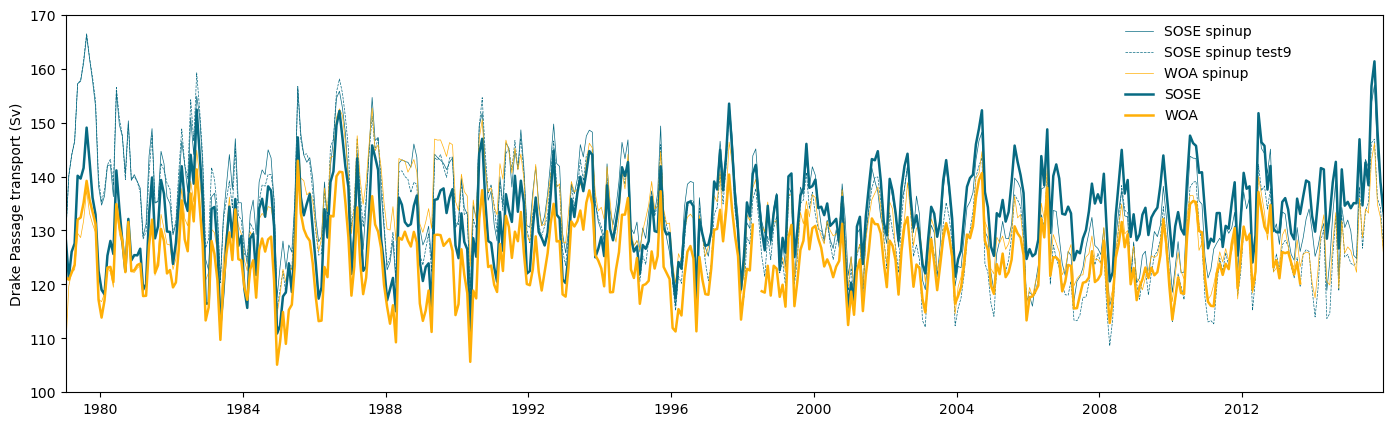

In [6]:
fig, ax = plt.subplots(1,1, figsize=(17,5), dpi=100)
ax.plot(ts_sose_spin.time_centered, ts_sose_spin.drake_passage_transport, label='SOSE spinup', linewidth=0.5, c='#076a82')
ax.plot(ts_test9.time_centered    , ts_test9.drake_passage_transport, label='SOSE spinup test9', linestyle='--', linewidth=0.5, c='#076a82')
ax.plot(ts_woa_spin.time_centered , ts_woa_spin.drake_passage_transport,  label='WOA spinup', linewidth=0.5, c='#ffaf07')
ax.plot(ts_sose.time_centered, ts_sose.drake_passage_transport.where(ts_sose.drake_passage_transport!=0), 
        label='SOSE', linewidth=1.8, c='#076a82')
ax.plot(ts_woa.time_centered , ts_woa.drake_passage_transport.where(ts_woa.drake_passage_transport!=0), 
        label='WOA', linewidth=1.8, c='#ffaf07')
ax.set_ylabel('Drake Passage transport (Sv)')
ax.set_xlim(ts_woa_spin.time_centered[0],ts_woa_spin.time_centered[-1])
ax.set_ylim(100, 170)
ax.legend(loc=(0.8, 0.7), frameon=False)

In [20]:
ts10 = xr.open_dataset(f'{base_dir}output/ERA5_test10/timeseries-drake.nc').sortby('time_centered')
ts11 = xr.open_dataset(f'{base_dir}output/ERA5_test11/timeseries-drake.nc').sortby('time_centered')
ts12 = xr.open_dataset(f'{base_dir}output/ERA5_test12/timeseries-drake.nc').sortby('time_centered')
ts13 = xr.open_dataset(f'{base_dir}output/ERA5_test13/timeseries-drake.nc').sortby('time_centered')

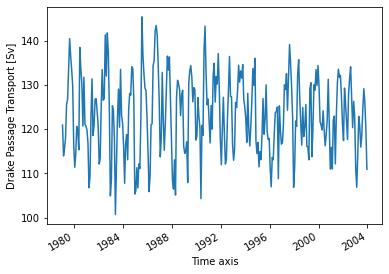

In [21]:
ts11.drake_passage_transport.plot()

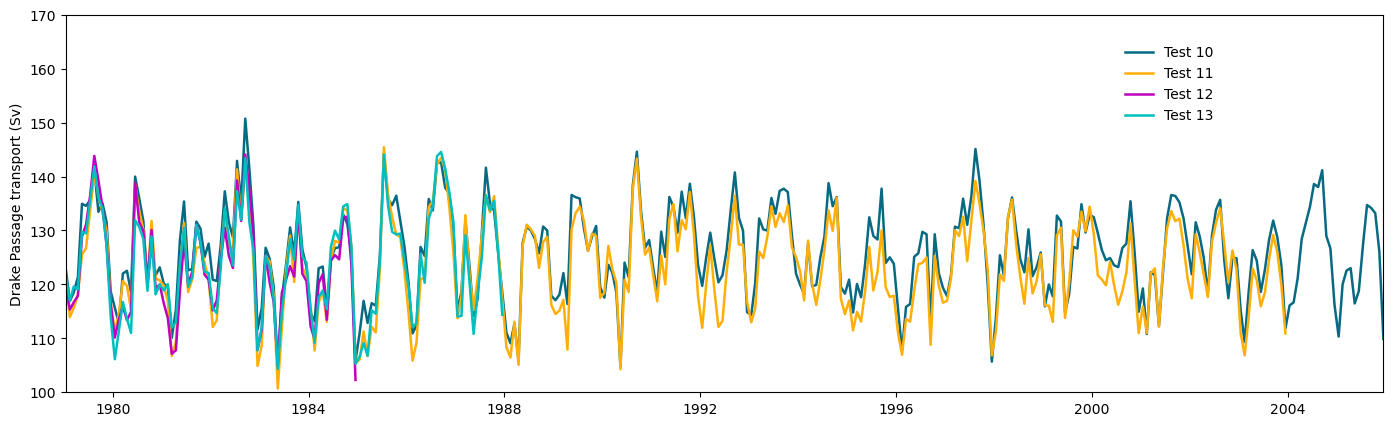

In [23]:
fig, ax = plt.subplots(1,1, figsize=(17,5), dpi=100)
ax.plot(ts10.time_centered, ts10.drake_passage_transport, label='Test 10', linewidth=1.8, c='#076a82')
ax.plot(ts11.time_centered, ts11.drake_passage_transport, label='Test 11', linewidth=1.8, c='#ffaf07')
ax.plot(ts12.time_centered, ts12.drake_passage_transport, label='Test 12', linewidth=1.8, c='m')
ax.plot(ts13.time_centered, ts13.drake_passage_transport, label='Test 13', linewidth=1.8, c='c')
ax.set_ylabel('Drake Passage transport (Sv)')
ax.set_xlim(ts.time_centered[0], ts.time_centered[-1])
ax.set_ylim(100, 170)
ax.legend(loc=(0.8, 0.7), frameon=False)

### And Weddell Gyre transport

In [37]:
ts10 = xr.open_dataset(f'{base_dir}output/ERA5_test10/timeseries-weddell.nc').sortby('time_centered')
ts11 = xr.open_dataset(f'{base_dir}output/ERA5_test11/timeseries-weddell.nc').sortby('time_centered')
ts12 = xr.open_dataset(f'{base_dir}output/ERA5_test12/timeseries-weddell.nc').sortby('time_centered')
ts13 = xr.open_dataset(f'{base_dir}output/ERA5_test13/timeseries-weddell.nc').sortby('time_centered')

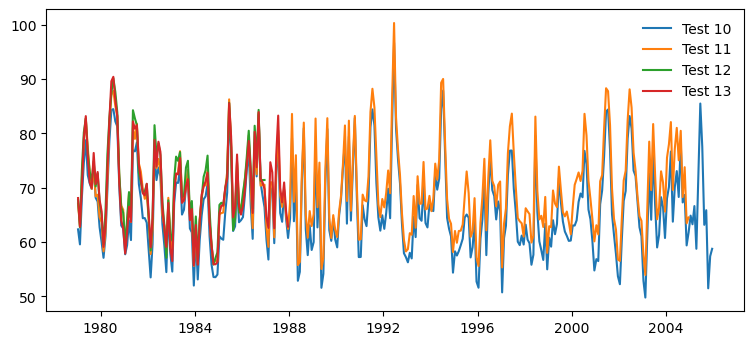

In [39]:
fig, ax = plt.subplots(1,1, figsize=(9,4), dpi=100)
ax.plot(ts10.time_counter, ts10.weddell_gyre_transport.where(ts10.weddell_gyre_transport!=0), label='Test 10')
ax.plot(ts11.time_counter, ts11.weddell_gyre_transport.where(ts11.weddell_gyre_transport!=0), label='Test 11')
ax.plot(ts12.time_counter, ts12.weddell_gyre_transport.where(ts12.weddell_gyre_transport!=0), label='Test 12')
ax.plot(ts13.time_counter, ts13.weddell_gyre_transport.where(ts13.weddell_gyre_transport!=0), label='Test 13')
ax.legend(frameon=False)